# **Zomato Data Analysis Project**

**importing libraries**                                        

pandas is used for data manupulation.
numpy used for numerical operations.
matplot.pyplot and seaborn used for data visualization.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**create data frame**

In [ ]:
df = pd.read_csv('/content/Zomato data .csv')
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [ ]:
def handlerate(value):
  value = str(value).split('/')
  value=value[0]
  return float(value)

df['rate']=df['rate'].apply(handlerate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


What type of restaurant do the majority of customers order from?

Text(0.5, 0, 'type of restaurant')

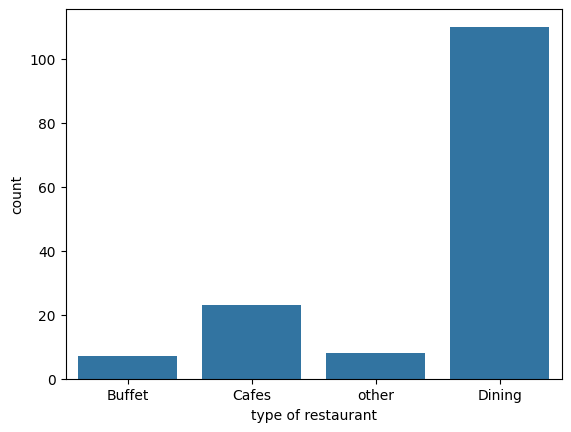

In [ ]:
sns.countplot(x= df['listed_in(type)'])
plt.xlabel('type of restaurant')

conclusion majority of restaurants fall under dining category

How many votes has each type of restaurant received from customers?

Text(0, 0.5, 'votes')

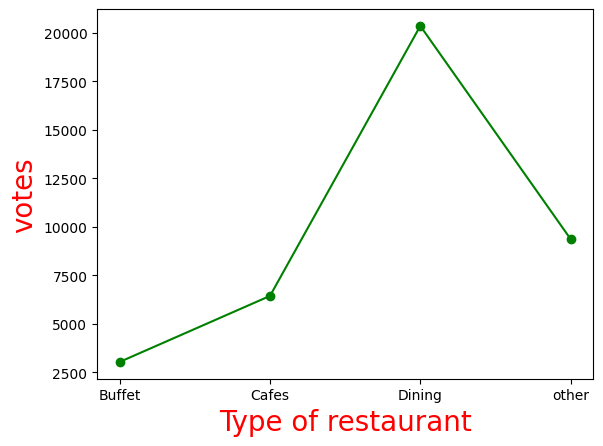

In [ ]:
grouped_data = df.groupby('listed_in(type)') ['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("votes", c="red", size=20)

majority votes  for dining

What are the ratings that the majority of restaurants have received?

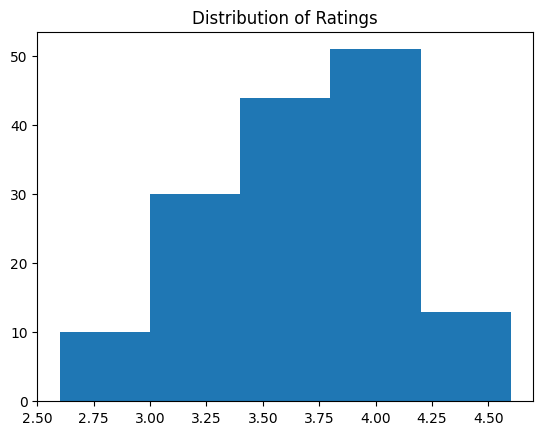

In [ ]:
plt.hist(df['rate'],bins=5)
plt.title('Distribution of Ratings')
plt.show()

conclusion majority ratings get between 3.5 to 4.5

Zomato has observed that most couples order most of their food online. What is their
average spending on each order?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

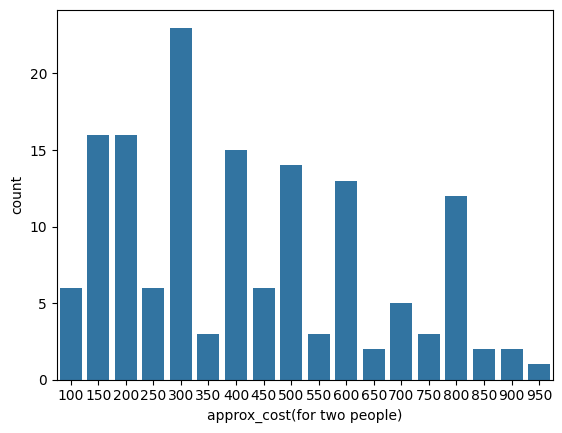

In [ ]:
couple_data=df[('approx_cost(for two people)')]
couple_data.mean()
sns.countplot(x=couple_data)

Which mode (online or offline) has received the maximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

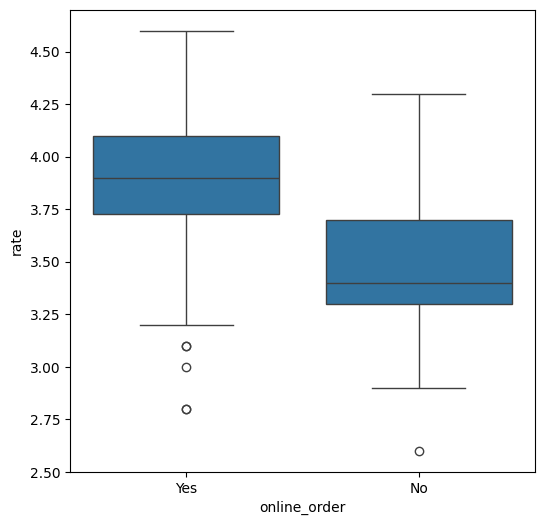

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='online_order',y='rate', data=df)

online orders has more rating
offline has lower rating

Which type of restaurant received more offline orders, so that Zomato can provide those
customers with some good offers?

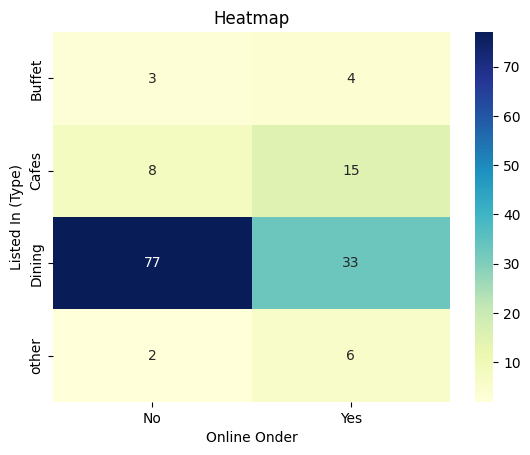

In [ ]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Onder")
plt.ylabel("Listed In (Type)")
plt.show()